In [173]:
import tensorflow_addons as tfa
from utils.explanations import integrated_gradients
from keras.utils import CustomObjectScope
import tensorflow.keras as keras
import tensorflow as tf
import os
from utils.explanations import minmax_norm
from utils.explanations import calculate_ig_attributions
from utils.utils import read_dataset
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt

archive = 'ucr'
dataset_name = 'Beef'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
dataset = 'Beef'
model_type ='fcn'
ylen = 1
data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
ylen = len(data[0][0])
ig_data_stl  = read_dataset(data_p, archive, dataset, f'{model_type}_ig_raw', ylen)[dataset]
dataset = 'Beef'
itr = 0
ig_link = f'./results/ucr/{dataset}/experiment_1/fcn/fcn_{itr}/original/best_model.hdf5'
ig_model = keras.models.load_model(ig_link ,compile=False)

In [174]:
print(ylen)

470


8/8 [==============================] - 0s 27ms/step
3


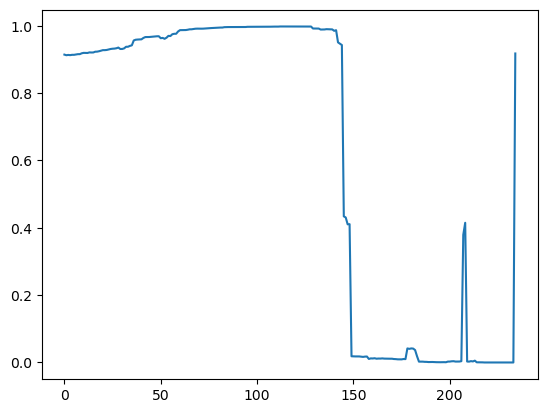

In [175]:
%matplotlib inline

train_att = ig_data_stl[1] 
ts = 20
sorted_vals = np.argsort(train_att[ts])
xvals = ig_data_stl[0][ts]
count = 230
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[ts])
#print(xvals)
sup_array = []
for idx in range(0, len(sorted_vals), 2):
    sup_x  = xvals.copy()
    #print(sorted_vals[:idx])
    #print(sorted_vals[:idx])
    sup_x[sorted_vals[:idx]] = np.nan 
    # Indices of non-NaN values
    not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
    # Linearly interpolate NaN values
    interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
    sup_array.append(interpolated_array)


sup_array = np.array(sup_array)
pred = ig_model.predict(sup_array)
print(pred_label)
#print(sup_array[50])
#plt.plot(sup_array[140])

plt.plot(pred[:,pred_label])
plt.show()



In [110]:
ig_model.predict(np.expand_dims(np.random.randn(286),axis=0))

1/1 [==============================] - 0s 16ms/step


array([[0., 1.]], dtype=float32)

8/8 [==============================] - 0s 30ms/step
3


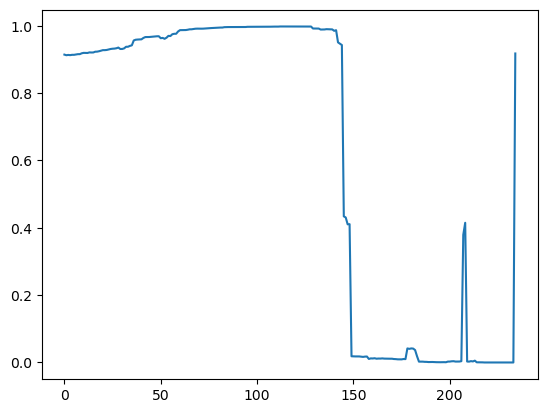

In [176]:
train_att = ig_data_stl[1] 
ts = 20
sorted_vals = np.argsort(train_att[ts])
xvals = ig_data_stl[0][ts]
count = 230
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[ts])
#print(xvals)
sup_array = []
for idx in range(0, len(sorted_vals), 2):
    sup_x  = xvals.copy()
    #print(sorted_vals[:idx])
    #print(sorted_vals[:idx])
    sup_x[sorted_vals[:idx]] = np.nan 
    # Indices of non-NaN values
    not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
    # Linearly interpolate NaN values
    interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
    sup_array.append(interpolated_array)


sup_array = np.array(sup_array)
pred = ig_model.predict(sup_array)
print(pred_label)
#print(sup_array[50])
#plt.plot(sup_array[140])

plt.plot(pred[:,pred_label])
plt.show()


1/1 [==============================] - 0s 51ms/step
[0.00064333 0.40831915 0.1814525  0.08257128 0.32701373]
1
15/15 [==============================] - 0s 29ms/step


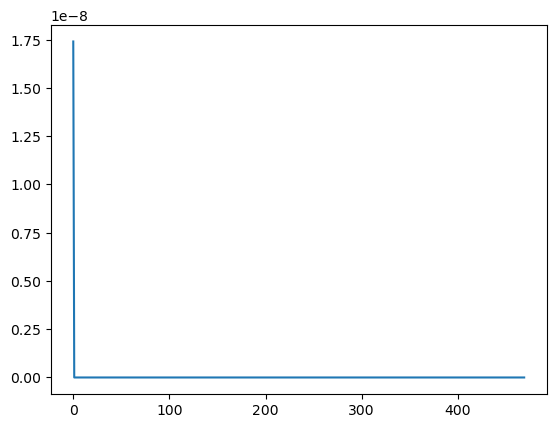

In [184]:
train_att = ig_data_stl[1] 
ts = 11
xvals = ig_data_stl[0][ts]
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[ts])
sorted_values = np.sort(xvals)[::-1]
baseline = np.zeros(470)
helper_array = []
for idx in range(0, len(sorted_vals), 1):
    baseline[idx] = sorted_vals[idx]
    helper_array.append(baseline.copy())

print(ig_model.predict(ig_data_stl[0])[ts])
print(pred_label)
add_att = ig_model.predict(np.array(helper_array))[:,pred_label]

plt.plot(add_att)

In [ ]:
"""

supp_x_vals_pred = []
for xv, pa in zip(x,p[1]):
    pa = pa.flatten()
    supp_x  = xv.copy()
    sorted = replace#(np.argsort(pa)[::-1][int(len(pa)*keep):])
    supp_x[sorted] = 0 #supp_strat[sorted]
    supp_x_vals_pred.append(supp_x)
"""